In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')
Rtec = pd.read_csv("rtec.csv")
Neon = pd.read_csv("neon.csv")
Neon

,U[V],Ua[V]
0,0.0,0.86
1,1.1,0.85
2,2.3,0.97
3,3.5,0.85
4,5.1,1.06
5,6.0,1.45
6,7.4,1.86
7,8.8,2.13
8,9.7,2.33
9,10.6,2.55


In [6]:
print(Rtec[:13].T.to_latex())
print(Rtec[14:26].T.to_latex())
print(Rtec[27:39].T.to_latex())
print(Rtec[40:51].T.to_latex())
# print(Rtec[45:51].T.to_latex())
print(Neon[:12].T.to_latex())
print(Neon[13:24].T.to_latex())
print(Neon[25:36].T.to_latex())
print(Neon[37:48].T.to_latex())
print(Neon[49:60].T.to_latex())
print(Neon[61:67].T.to_latex())
# print(Neon[67:].T.to_latex())
# print(Neon.to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &    0  &    1  &    2  &    3  &    4  &    5  &    6  &    7  &    8  &    9  &    10 &     11 &     12 \\
\midrule
U[V]  &   0.2 &   0.5 &   2.6 &   3.6 &   4.5 &   5.5 &   6.6 &   7.6 &   8.2 &   9.0 &   9.4 &   10.6 &   11.0 \\
Ua[V] &  31.2 &  31.8 &  38.2 &  30.1 &  28.5 &  37.5 &  42.6 &  41.1 &  36.9 &  41.5 &  48.5 &  106.0 &  121.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &     14 &    15 &    16 &    17 &    18 &    19 &     20 &     21 &     22 &     23 &     24 &    25 \\
\midrule
U[V]  &   11.6 &  12.5 &  13.1 &  13.3 &  13.5 &  14.2 &   15.2 &   15.7 &   16.2 &   16.4 &   16.6 &  17.6 \\
Ua[V] &  131.8 &  64.2 &  45.9 &  43.1 &  46.5 &  56.9 &  112.6 &  166.0 &  197.0 &  198.9 &  182.2 &  76.5 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &    27 &    28 &     29 &     30 &     31 &     32 &     33 &     34 &     35 &    36 &    37 &    38 \\
\midrule
U[V]  &  18.3 &  

In [11]:
Rtecka=Rtec
Rtecka['Ua[V]']*=10
Rtecka

,U[V],Ua[V]
0,0.2,31200.0
1,0.5,31800.0
2,2.6,38200.0
3,3.6,30100.0
4,4.5,28500.0
5,5.5,37500.0
6,6.6,42600.0
7,7.6,41100.0
8,8.2,36900.0
9,9.0,41500.0


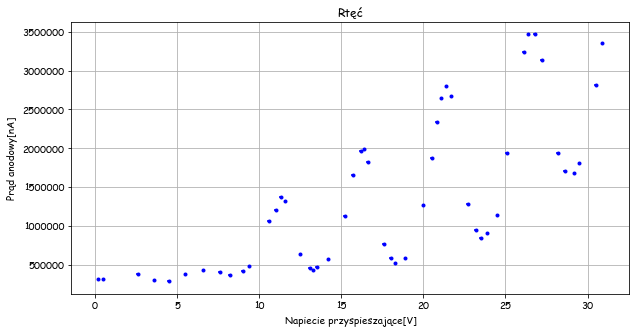

In [12]:
klasa = 0.01
plt.figure(figsize=(10,5))
plt.errorbar(Rtec['U[V]'],Rtec['Ua[V]']*10,2,0.1,'b.')#klasa*Rtec['U[V]']+0.1,klasa*Rtec['U[V]']+0.01,'b.')
plt.grid(); plt.xlabel('Napiecie przyspieszające[V]'); plt.ylabel('Prąd anodowy[nA]'); plt.title('Rtęć')
plt.savefig('rtec.eps', bbox_inches='tight')
plt.show()
# plt.figure(figsize=(10,5))
# plt.errorbar(Neon['U[V]'],Neon['Ua[V]']*10,2,0.1,'g.')#klasa*Neon['U[V]']+0.1,klasa*Neon['U[V]']+0.01,'g.')
# plt.grid(); plt.xlabel('Napiecie przyspieszające[V]'); plt.ylabel('Prąd anodowy[nA]'); plt.title('Neon')
# plt.savefig('neon.png')

In [13]:
#Rtęć maksima
U_max_rtec = (Rtec['U[V]'][43]-Rtec['U[V]'][6])/4
#Rtęć minima
U_min_rtec = (Rtec['U[V]'][47]-Rtec['U[V]'][4])/5